# Baseline Model and Pipeline for Hit-Predict Project

## Table of Contents
1. [Setup](#setup)
    - [Importing Libraries](#lib)
    - [Loading Data](#data)
2. [Baseline Models](#baseline)
    - [Regression Problem](#sub1)
    - [Classification Problem with Classes by 20](#sub2)
    - [Classification Problem with Classes by 5](#sub3)
3. [Final Model Pipeline](#pipeline)

## 1. Setup
<a id="setup"></a>

### Importing Libraries
<a id="lib"></a>

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Loading Data
<a id="data"></a>

In [75]:
DATA_PATH_nothing = "../data/processed_spotify_songs.csv"
df_nothing = pd.read_csv(DATA_PATH_nothing)

DATA_PATH_0mean = "../data/0mean_data.csv"
df_0mean = pd.read_csv(DATA_PATH_0mean)

DATA_PATH_no0 = "../data/no0_data.csv"
df_no0 = pd.read_csv(DATA_PATH_no0)

#### Drop non-numerical data

In [76]:
df_nothing = df_nothing.drop(columns=["track_artist", "track_album_id","track_album_release_date","playlist_id","playlist_subgenre"])
df_0mean = df_0mean.drop(columns=["track_artist", "track_album_id","track_album_release_date","playlist_id","playlist_subgenre"])
df_no0 = df_no0.drop(columns=["track_artist", "track_album_id","track_album_release_date","playlist_id","playlist_subgenre"])

## 2. Baseline Models
<a id="baseline"></a>

Recall that in the EDA notebook, we noticed that there was a high class imbalance in the target variable, especially with regards to a very high number of tracks that had a popularity score of 0. We discussed different ways to address this imbalance in the preprocessing steps of our data in previous notebooks and saved the different final preprocessed data in 3 different csv files. We will thus test all of our methods against these 3 preprocessing methods to evaluate potential improvements or not of the performances of our different models.

### Split the data

In [77]:
# Split the dataset before resampling
X_nothing = df_nothing.drop(columns=["track_popularity"])
y_nothing = df_nothing["track_popularity"]

X_train_nothing, X_test_nothing, y_train_nothing, y_test_nothing = train_test_split(X_nothing, y_nothing, test_size=0.2, random_state=42)

X_0mean = df_0mean.drop(columns=["track_popularity"])
y_0mean = df_0mean["track_popularity"]

X_train_0mean, X_test_0mean, y_train_0mean, y_test_0mean = train_test_split(X_0mean, y_0mean, test_size=0.2, random_state=42)

X_no0 = df_no0.drop(columns=["track_popularity"])
y_no0 = df_no0["track_popularity"]

X_train_no0, X_test_no0, y_train_no0, y_test_no0 = train_test_split(X_no0, y_no0, test_size=0.2, random_state=42)


In [78]:
# helper functions

def get_metrics(model, name: str, data: tuple) -> dict:
    x_train, x_test, y_train, y_test = data
    d = {}
    y_hat_train = model.predict(x_train)
    y_hat_test = model.predict(x_test)
    d['name'] = name
    d['train_mse'] = mean_squared_error(y_train, y_hat_train)
    d['test_mse'] = mean_squared_error(y_test, y_hat_test)
    d['r2_train'] = r2_score(y_train, y_hat_train)
    d['r2_test'] = r2_score(y_test, y_hat_test)
    return d

## Regression Problem

**Do nothing dataset**

In [79]:
lin_reg_nothing = LinearRegression().fit(X_train_nothing, y_train_nothing)
data = (X_train_nothing, X_test_nothing, y_train_nothing, y_test_nothing)
results = [get_metrics(lin_reg_nothing, 'Linear Regression', data)]

**0 mean dataset**

In [80]:
lin_reg_0mean = LinearRegression().fit(X_train_0mean, y_train_0mean)
data = (X_train_0mean, X_test_0mean, y_train_0mean, y_test_0mean)
results.append(get_metrics(lin_reg_0mean, 'Linear Regression 0mean', data))

**No zero dataset**

In [81]:
lin_reg_no0 = LinearRegression().fit(X_train_no0, y_train_no0)
data = (X_train_no0, X_test_no0, y_train_no0, y_test_no0)
results.append(get_metrics(lin_reg_no0, 'Linear Regression no0', data))

**Results**

In [82]:
pd.DataFrame(results)

,name,train_mse,test_mse,r2_train,r2_test
0,Linear Regression,13.422934,12.007848,0.976120,0.978549
1,Linear Regression 0mean,47.210756,45.731283,0.903580,0.906142
2,Linear Regression no0,14.148650,14.649906,0.968198,0.967277


## Classification Problem with Classes by 5

#### Encode the track_popularity 

In [83]:
# create a bins and labels for the popularity
num_categories = 5

bins = [i * (100 / num_categories) for i in range(num_categories + 1)]
labels = list(range(0, num_categories))

In [84]:
# create a new column for the popularity category
df_nothing['popularity_category'] = pd.cut(
    df_nothing['track_popularity'], bins=bins, labels=labels, include_lowest=True)

df_nothing = df_nothing.drop(columns=["track_popularity"])

df_0mean['popularity_category'] = pd.cut(
    df_0mean['track_popularity'], bins=bins, labels=labels, include_lowest=True)

df_0mean = df_0mean.drop(columns=["track_popularity"])

df_no0['popularity_category'] = pd.cut(
    df_no0['track_popularity'], bins=bins, labels=labels, include_lowest=True)

df_no0 = df_no0.drop(columns=["track_popularity"])

**Split the different dataset**

In [85]:
X_nothing = df_nothing.drop(columns=["popularity_category"])
y_nothing = df_nothing["popularity_category"]

X_train_nothing, X_test_nothing, y_train_nothing, y_test_nothing = train_test_split(X_nothing, y_nothing, test_size=0.2, random_state=42)

X_0mean = df_0mean.drop(columns=["popularity_category"])
y_0mean = df_0mean["popularity_category"]

X_train_0mean, X_test_0mean, y_train_0mean, y_test_0mean = train_test_split(X_0mean, y_0mean, test_size=0.2, random_state=42)

X_no0 = df_no0.drop(columns=["popularity_category"])
y_no0 = df_no0["popularity_category"]

X_train_no0, X_test_no0, y_train_no0, y_test_no0 = train_test_split(X_no0, y_no0, test_size=0.2, random_state=42)

**Parameters**

In [86]:
depths = np.arange(1, 21)

#### Some EDAs

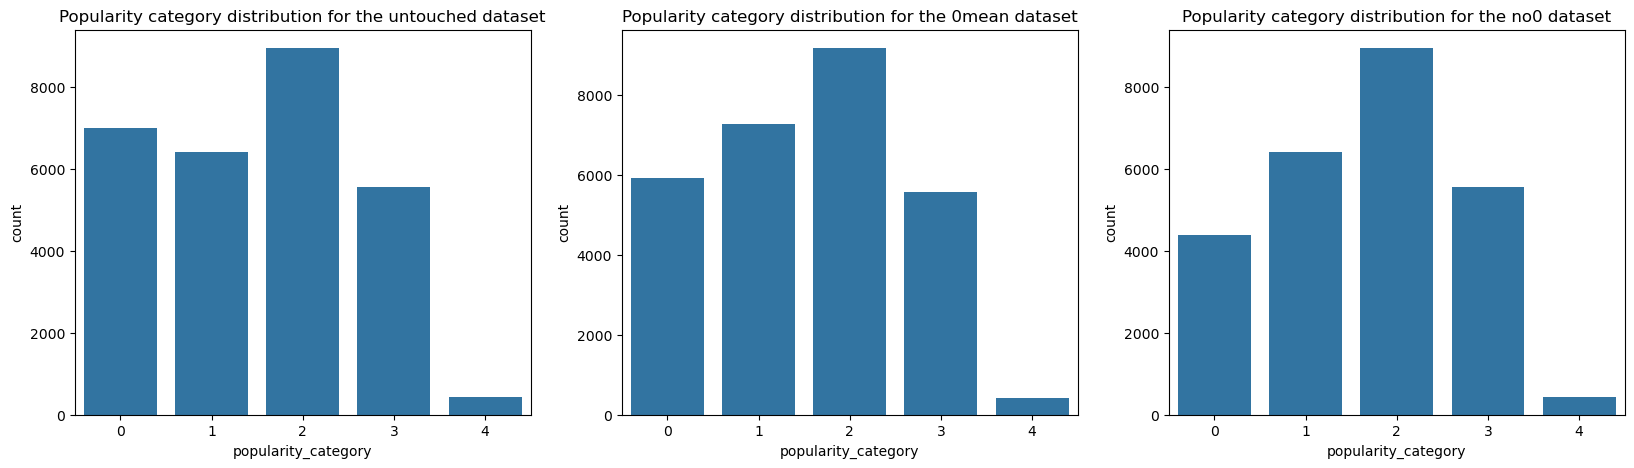

In [87]:
# plot distribution of popularity categories

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.countplot(x='popularity_category', data=df_nothing, ax=ax[0])
ax[0].set_title('Popularity category distribution for the untouched dataset')

sns.countplot(x='popularity_category', data=df_0mean, ax=ax[1])
ax[1].set_title('Popularity category distribution for the 0mean dataset')

sns.countplot(x='popularity_category', data=df_no0, ax=ax[2])
ax[2].set_title('Popularity category distribution for the no0 dataset')

plt.show()

### DecisionTree

In [88]:
results = []

**Do nothing dataset**

In [89]:
# train a decision tree classifier on the dataset
train_accuracy_nothing = []
test_accuracy_nothing = []
for depth in depths:
    clf_nothing = DecisionTreeClassifier(max_depth=depth)
    clf_nothing.fit(X_train_nothing, y_train_nothing)
    
    train_accuracy_nothing.append(accuracy_score(y_train_nothing, clf_nothing.predict(X_train_nothing)))
    test_accuracy_nothing.append(accuracy_score(y_test_nothing, clf_nothing.predict(X_test_nothing)))
    

**0mean dataset**

In [90]:
train_accuracy_0mean = []
test_accuracy_0mean = []
for depth in depths:
    clf_0mean = DecisionTreeClassifier(max_depth=depth)
    clf_0mean.fit(X_train_0mean, y_train_0mean)
    
    train_accuracy_0mean.append(accuracy_score(y_train_0mean, clf_0mean.predict(X_train_0mean)))
    test_accuracy_0mean.append(accuracy_score(y_test_0mean, clf_0mean.predict(X_test_0mean)))

**No 0 dataset**

In [91]:
train_accuracy_no0 = []
test_accuracy_no0 = []
for depth in depths:
    clf_no0 = DecisionTreeClassifier(max_depth=depth)
    clf_no0.fit(X_train_no0, y_train_no0)
    
    train_accuracy_no0.append(accuracy_score(y_train_no0, clf_no0.predict(X_train_no0)))
    test_accuracy_no0.append(accuracy_score(y_test_no0, clf_no0.predict(X_test_no0)))

**Plot the results**

Text(0.5, 0, 'Max depth')

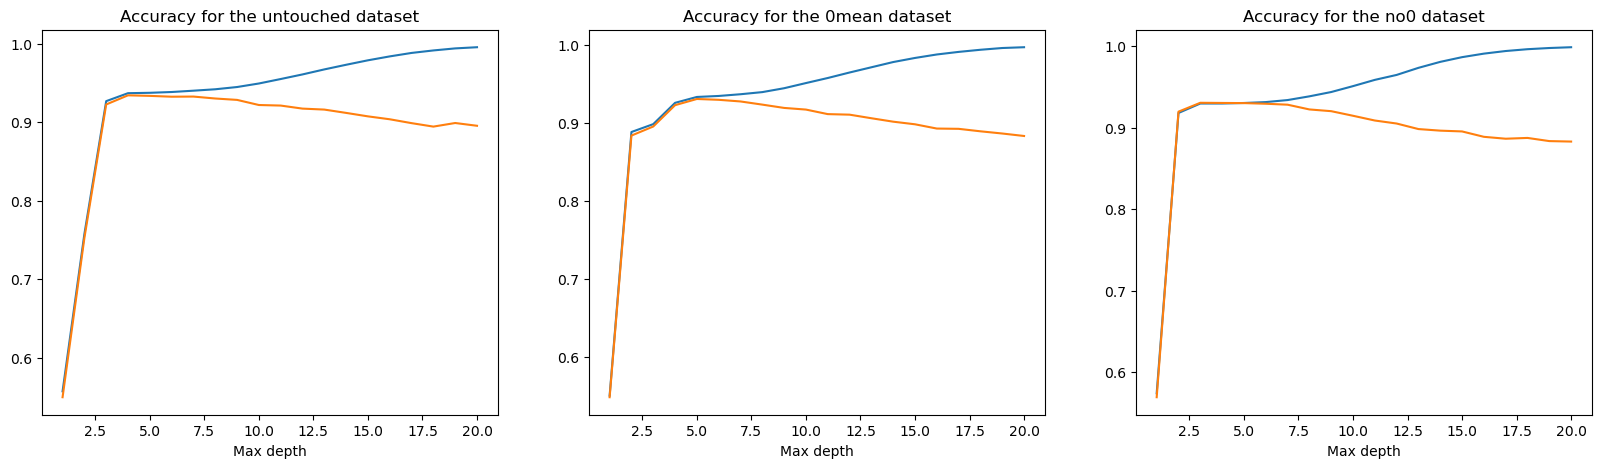

In [92]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].plot(depths, train_accuracy_nothing, label='train')
ax[0].plot(depths, test_accuracy_nothing, label='test')
ax[0].set_title('Accuracy for the untouched dataset')
ax[0].set_xlabel('Max depth')

ax[1].plot(depths, train_accuracy_0mean, label='train')
ax[1].plot(depths, test_accuracy_0mean, label='test')
ax[1].set_title('Accuracy for the 0mean dataset')
ax[1].set_xlabel('Max depth')

ax[2].plot(depths, train_accuracy_no0, label='train')
ax[2].plot(depths, test_accuracy_no0, label='test')
ax[2].set_title('Accuracy for the no0 dataset')
ax[2].set_xlabel('Max depth')   

**Find the best result for each dataset**

In [93]:
best_result_nothing = max(test_accuracy_nothing)
best_depth_nothing = depths[test_accuracy_nothing.index(best_result_nothing)]

results.append(["Decision Tree", "Untouched", best_result_nothing, best_depth_nothing])

best_result_0mean = max(test_accuracy_0mean)
best_depth_0mean = depths[test_accuracy_0mean.index(best_result_0mean)]

results.append(["Decision Tree", "0mean", best_result_0mean, best_depth_0mean])

best_result_no0 = max(test_accuracy_no0)
best_depth_no0 = depths[test_accuracy_no0.index(best_result_no0)]

results.append(["Decision Tree", "no0", best_result_no0, best_depth_no0])

**Results**

In [95]:
col = ["Model", "Dataset", "Accuracy", "Best Depth"]

pd.DataFrame(results, columns=col)

,Model,Dataset,Accuracy,Best Depth
0,Decision Tree,Untouched,0.934050,4
1,Decision Tree,0mean,0.931053,5
2,Decision Tree,no0,0.930458,3
